In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [93]:
def get_data():
    """Unpack data"""
    stock = pd.read_csv("data/stock_data.csv")[["date", "ticker", "open" , "high", "low", "close"]]
    stock["date"] = pd.to_datetime(stock["date"])
    tickets = pd.read_csv("data/ticker_info.csv", index_col= 0)
    return stock, tickets

    

In [216]:
def calculate_mfm(data):
    data["mfm"] = ((data["close"] - data["low"]) - (data["high"] - data["close"]))*100/(data["high"] - data["low"])
    data.loc[data["mfm"].isna(), "mfm"] = 0.0
    return data

def calc_strategy(stock, low = -90.0, high = 90.0):
    stock["signal"] = np.nan
    stock_numpy = stock.to_numpy()
    for index in range(2, len(stock)):
        if (stock_numpy[index, 6] <= low) & (stock_numpy[index - 1, 6] > low) & (stock_numpy[index - 2, 6] > low):
            stock_numpy[index, 7] = "buy"
        elif (stock_numpy[index, 6] >= high) & (stock_numpy[index - 1, 6] < high) & (stock_numpy[index - 2, 6] < high):
            stock_numpy[index, 7] = "sell"
    return pd.DataFrame(stock_numpy, columns = stock.columns)

def plot_signals(data, ticker_name):
    figure(figsize=(10, 6), dpi=80)
    data_with_signals = data[~data["signal"].isna()].to_dict(orient='records')
    for row in data_with_signals:
        if row["signal"] == "buy":
            plt.plot(row["date"], row["close"],'ro', color='green')
        elif row["signal"] == "sell":
            plt.plot(row["date"], row["close"],'ro', color='red')
    plt.plot(data["date"], data["close"], color = "black")
    plt.xlabel("date")
    plt.ylabel("close")
    plt.title(f"Buy and sell dots of {ticker_name}")
    
            
        

/var/folders/33/pml9j82x2hz0y5wjjt4ws6sm0000gn/T/ipykernel_28899/1279415534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mfm"] = ((data["close"] - data["low"]) - (data["high"] - data["close"]))*100/(data["high"] - data["low"])
/var/folders/33/pml9j82x2hz0y5wjjt4ws6sm0000gn/T/ipykernel_28899/1279415534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock["signal"] = np.nan
/var/folders/33/pml9j82x2hz0y5wjjt4ws6sm0000gn/T/ipykernel_28899/1279415534.py:21: UserWarning: color is redundantly de

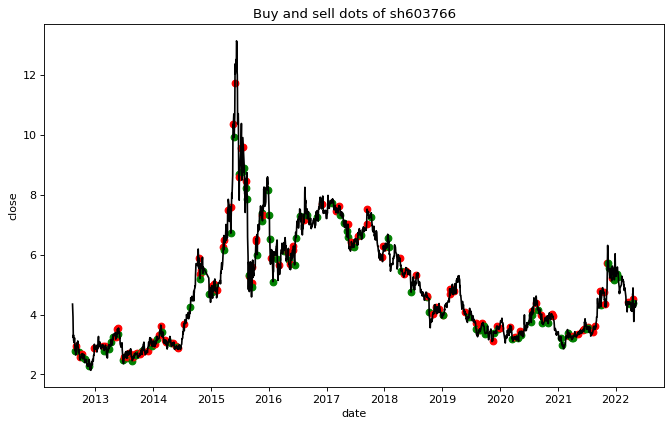

In [228]:
ticker_name = list(stock.ticker.sample(1).items())[0][1]
single_comp = stock[stock["ticker"]==ticker_name]
stock_with_mfm = calculate_mfm(single_comp)
stock_with_signals = calc_strategy(stock_with_mfm)
plot_signals(stock_with_signals, ticker_name = ticker_name)